In [13]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("mustahik_2024.csv")

print("✅ Data berhasil dimuat")
display(df.head())

✅ Data berhasil dimuat


,id_nama,bulan,ktp,kk,sktm,foto_rumah,pendapatan,jenis_bantuan,ktp_ortu,foto_sekolah,surat_aktif_sekolah,rincian_spp,rincian_seragam
0,Ahmad,Januari,1,1,1,1,250000,Pendidikan,1,1,1,1,1
1,Budi,Januari,1,1,1,1,300000,Sosial,0,0,0,0,0
2,Citra,Januari,1,1,1,1,150000,Advokasi,0,0,0,0,0
3,Dina,Januari,1,1,1,1,400000,Pendidikan,1,1,1,1,1
4,Eko,Januari,1,1,0,1,600000,Sosial,0,0,0,0,0


In [14]:
BATAS_PENDAPATAN = 500000

SYARAT_UMUM = ['ktp', 'kk', 'sktm', 'foto_rumah']
SYARAT_PENDIDIKAN = [
    'ktp_ortu', 'foto_sekolah',
    'surat_aktif_sekolah',
    'rincian_spp', 'rincian_seragam'
]

def tentukan_status(row):
    dokumen_kurang = []

    for col in SYARAT_UMUM:
        if int(row[col]) != 1:
            dokumen_kurang.append(col)

    if str(row['jenis_bantuan']).lower() == 'pendidikan':
        for col in SYARAT_PENDIDIKAN:
            if int(row[col]) != 1:
                dokumen_kurang.append(col)

    pendapatan_lolos = row['pendapatan'] <= BATAS_PENDAPATAN

    total_syarat = len(SYARAT_UMUM)
    if str(row['jenis_bantuan']).lower() == 'pendidikan':
        total_syarat += len(SYARAT_PENDIDIKAN)

    lengkap = total_syarat - len(dokumen_kurang)
    persentase = (lengkap / total_syarat) * 100

    if len(dokumen_kurang) == 0 and pendapatan_lolos:
        status = "DITERIMA"
        alasan = "Memenuhi semua persyaratan"
    else:
        status = "DITOLAK"
        penyebab = []
        if len(dokumen_kurang) > 0:
            penyebab.append("Dokumen tidak lengkap")
        if not pendapatan_lolos:
            penyebab.append("Pendapatan melebihi batas")
        alasan = " dan ".join(penyebab)

    return pd.Series({
        'Persentase Kelengkapan (%)': round(persentase, 1),
        'Dokumen Kurang': ", ".join(dokumen_kurang),
        'Alasan': alasan,
        'Status': status
    })

# ===============================
# PROSES SEMUA BULAN SEKALIGUS
# ===============================
df_hasil = df.copy()
hasil_status = df_hasil.apply(tentukan_status, axis=1)
df_hasil = pd.concat([df_hasil, hasil_status], axis=1)

# tampilkan hasil per bulan + total
for bulan in df_hasil['bulan'].unique():
    print(f"\n===== HASIL BULAN {bulan.upper()} =====")
    data_bulan = df_hasil[df_hasil['bulan'] == bulan]

    display(data_bulan[[
        'id_nama', 'jenis_bantuan', 'pendapatan',
        'Persentase Kelengkapan (%)',
        'Dokumen Kurang', 'Alasan', 'Status'
    ]])

    total_diterima = (data_bulan['Status'] == 'DITERIMA').sum()
    total_ditolak = (data_bulan['Status'] == 'DITOLAK').sum()

    print(f"✅ Total DITERIMA bulan {bulan}: {total_diterima}")
    print(f"❌ Total DITOLAK bulan {bulan}: {total_ditolak}")


===== HASIL BULAN JANUARI =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
0,Ahmad,Pendidikan,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
1,Budi,Sosial,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
2,Citra,Advokasi,150000,100.0,,Memenuhi semua persyaratan,DITERIMA
3,Dina,Pendidikan,400000,100.0,,Memenuhi semua persyaratan,DITERIMA
4,Eko,Sosial,600000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Januari: 4
❌ Total DITOLAK bulan Januari: 1

===== HASIL BULAN FEBRUARI =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
5,Fajar,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
6,Gina,Sosial,350000,100.0,,Memenuhi semua persyaratan,DITERIMA
7,Hadi,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
8,Indah,Pendidikan,450000,100.0,,Memenuhi semua persyaratan,DITERIMA
9,Joko,Sosial,650000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Februari: 4
❌ Total DITOLAK bulan Februari: 1

===== HASIL BULAN MARET =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
10,Kiki,Pendidikan,180000,100.0,,Memenuhi semua persyaratan,DITERIMA
11,Lina,Sosial,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
12,Maman,Advokasi,220000,100.0,,Memenuhi semua persyaratan,DITERIMA
13,Nina,Pendidikan,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
14,Oki,Sosial,700000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Maret: 4
❌ Total DITOLAK bulan Maret: 1

===== HASIL BULAN APRIL =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
15,Putri,Pendidikan,100000,100.0,,Memenuhi semua persyaratan,DITERIMA
16,Rian,Sosial,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
17,Sari,Advokasi,350000,100.0,,Memenuhi semua persyaratan,DITERIMA
18,Tono,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
19,Umi,Sosial,750000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan April: 4
❌ Total DITOLAK bulan April: 1

===== HASIL BULAN MEI =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
20,Vina,Pendidikan,150000,100.0,,Memenuhi semua persyaratan,DITERIMA
21,Wawan,Sosial,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
22,Xena,Advokasi,230000,100.0,,Memenuhi semua persyaratan,DITERIMA
23,Yudi,Pendidikan,400000,100.0,,Memenuhi semua persyaratan,DITERIMA
24,Zaki,Sosial,650000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Mei: 4
❌ Total DITOLAK bulan Mei: 1

===== HASIL BULAN JUNI =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
25,Andi,Pendidikan,180000,100.0,,Memenuhi semua persyaratan,DITERIMA
26,Bela,Sosial,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
27,Cahyo,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
28,Dewi,Pendidikan,350000,100.0,,Memenuhi semua persyaratan,DITERIMA
29,Evan,Sosial,700000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Juni: 4
❌ Total DITOLAK bulan Juni: 1

===== HASIL BULAN JULI =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
30,Fahmi,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
31,Gilang,Sosial,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
32,Hana,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
33,Irma,Pendidikan,150000,100.0,,Memenuhi semua persyaratan,DITERIMA
34,Jihan,Sosial,800000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Juli: 4
❌ Total DITOLAK bulan Juli: 1

===== HASIL BULAN AGUSTUS =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
35,Kamal,Pendidikan,100000,100.0,,Memenuhi semua persyaratan,DITERIMA
36,Lala,Sosial,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
37,Made,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
38,Nadia,Pendidikan,350000,100.0,,Memenuhi semua persyaratan,DITERIMA
39,Omar,Sosial,700000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Agustus: 4
❌ Total DITOLAK bulan Agustus: 1

===== HASIL BULAN SEPTEMBER =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
40,Putra,Pendidikan,100000,100.0,,Memenuhi semua persyaratan,DITERIMA
41,Rosa,Sosial,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
42,Sinta,Advokasi,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
43,Tegar,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
44,Ucup,Sosial,750000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan September: 4
❌ Total DITOLAK bulan September: 1

===== HASIL BULAN OKTOBER =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
45,Vito,Pendidikan,150000,100.0,,Memenuhi semua persyaratan,DITERIMA
46,Wulan,Sosial,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
47,Yoga,Advokasi,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
48,Zahra,Pendidikan,400000,100.0,,Memenuhi semua persyaratan,DITERIMA
49,Arif,Sosial,700000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Oktober: 4
❌ Total DITOLAK bulan Oktober: 1

===== HASIL BULAN NOVEMBER =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
50,Beni,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
51,Caca,Sosial,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
52,Dodi,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
53,Elsa,Pendidikan,350000,100.0,,Memenuhi semua persyaratan,DITERIMA
54,Farid,Sosial,700000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan November: 4
❌ Total DITOLAK bulan November: 1

===== HASIL BULAN DESEMBER =====


,id_nama,jenis_bantuan,pendapatan,Persentase Kelengkapan (%),Dokumen Kurang,Alasan,Status
55,Gita,Pendidikan,200000,100.0,,Memenuhi semua persyaratan,DITERIMA
56,Herman,Sosial,300000,100.0,,Memenuhi semua persyaratan,DITERIMA
57,Intan,Advokasi,250000,100.0,,Memenuhi semua persyaratan,DITERIMA
58,Jefri,Pendidikan,150000,100.0,,Memenuhi semua persyaratan,DITERIMA
59,Karin,Sosial,800000,75.0,sktm,Dokumen tidak lengkap dan Pendapatan melebihi ...,DITOLAK


✅ Total DITERIMA bulan Desember: 4
❌ Total DITOLAK bulan Desember: 1


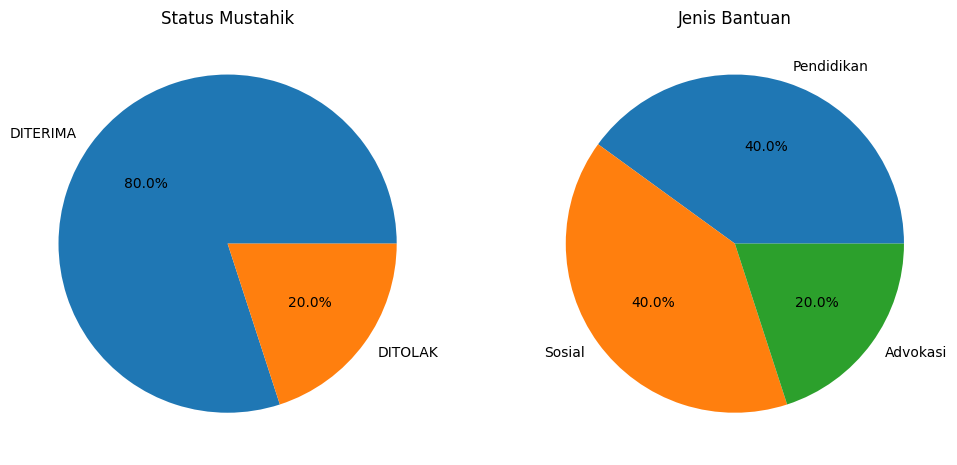

In [15]:
import matplotlib.pyplot as plt

# ==============================
# PIE 1: STATUS (DITERIMA vs DITOLAK)
# ==============================
total_diterima = (df_hasil['Status'] == 'DITERIMA').sum()
total_ditolak  = (df_hasil['Status'] == 'DITOLAK').sum()

# ==============================
# PIE 2: JENIS BANTUAN
# ==============================
jumlah_jenis = df['jenis_bantuan'].value_counts()

# ==============================
# TAMPILKAN DALAM 1 BARIS
# ==============================
plt.figure(figsize=(12,6))

# Pie kiri - status
plt.subplot(1,2,1)
plt.pie([total_diterima, total_ditolak], labels=['DITERIMA','DITOLAK'], autopct='%1.1f%%')
plt.title("Status Mustahik")

# Pie kanan - jenis bantuan
plt.subplot(1,2,2)
plt.pie(jumlah_jenis.values, labels=jumlah_jenis.index, autopct='%1.1f%%')
plt.title("Jenis Bantuan")

plt.show()